In [77]:
import cv2
import os
import numpy as np
from skimage import io
from matplotlib import pyplot as plt
%matplotlib inline

In [78]:
def image_show(image, nrows=1, ncols=1, cmap='gray'):
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(14,14))
    ax.imshow(image, cmap='gray')
    ax.axis('off')
    return fig,ax

In [79]:
# import image
image = cv2.imread('test8.jpg')
image = cv2.resize(image, (256,256))

(<Figure size 1008x1008 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x80504e2b48>)

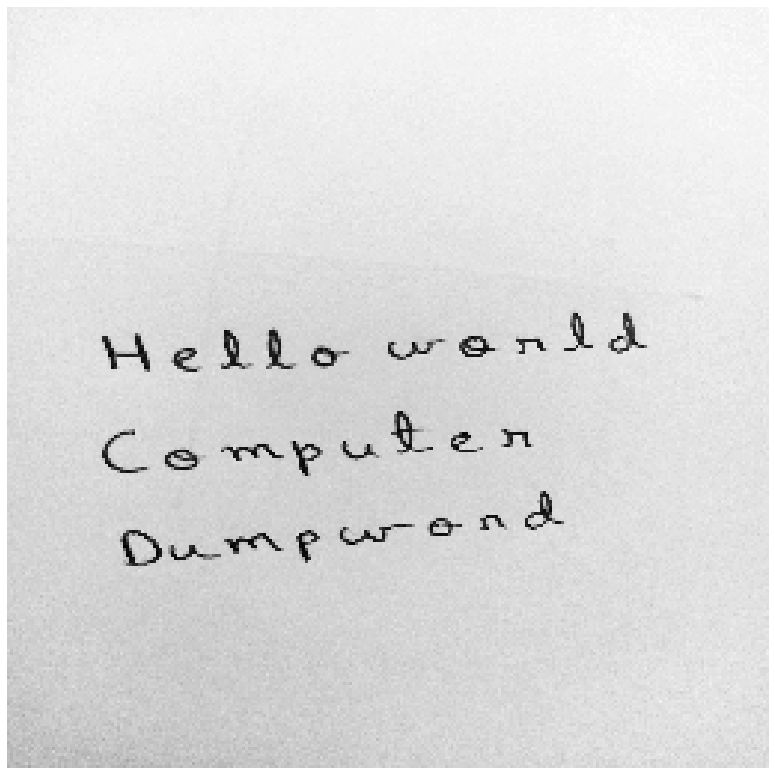

In [80]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image_show(gray)

(<Figure size 1008x1008 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x805052d888>)

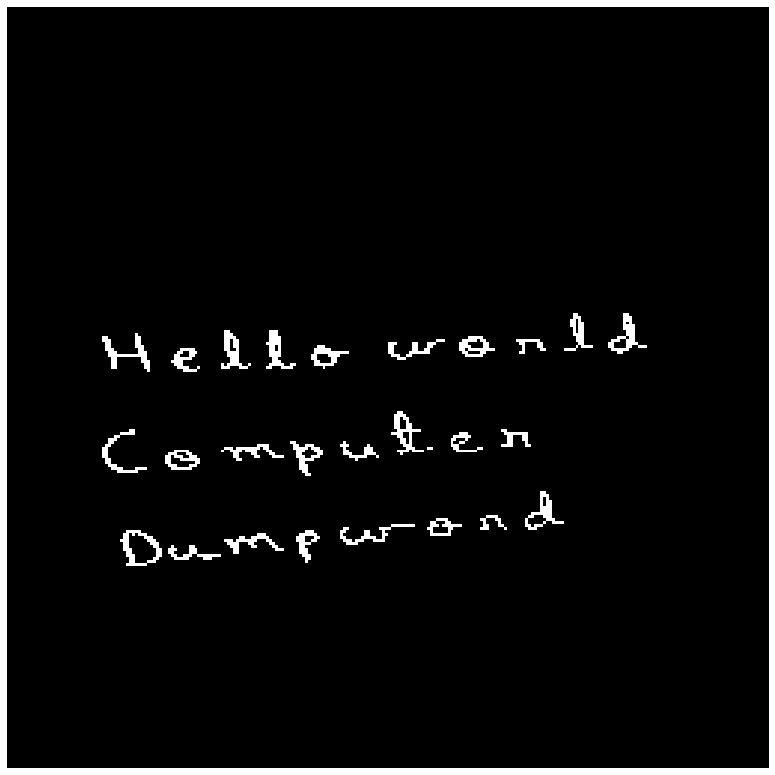

In [81]:
ret, thresh = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY_INV)
image_show(thresh)

(<Figure size 1008x1008 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x805058d888>)

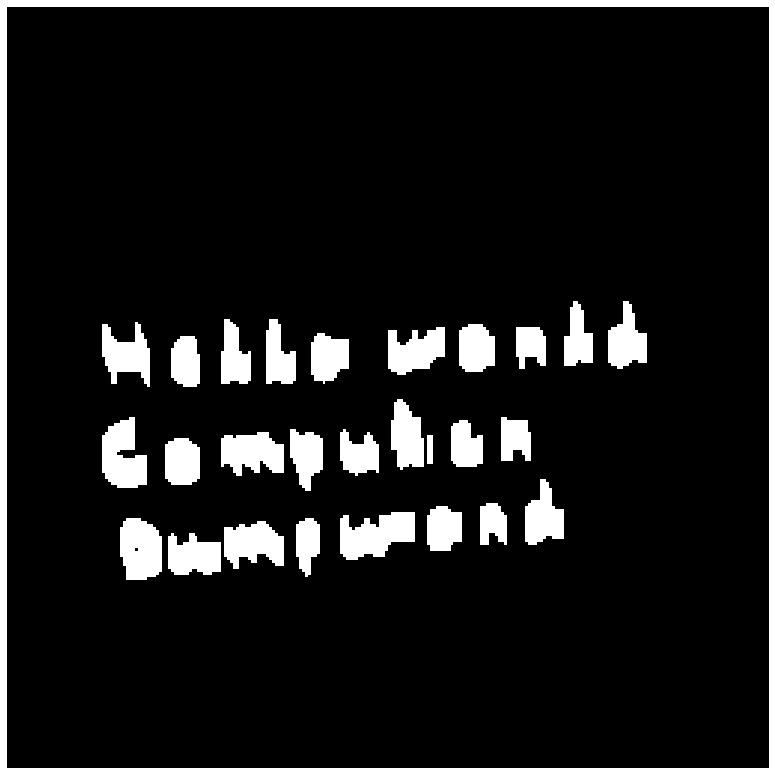

In [82]:
# dilation
kernel = np.ones((10, 1), np.uint8)
img_dilation = cv2.dilate(thresh, kernel, iterations=1)
image_show(img_dilation)

In [83]:
# find contours
# cv2.findCountours() function changed from OpenCV3 to OpenCV4: now it have only two parameters instead of 3
cv2MajorVersion = cv2.__version__.split(".")[0]
# check for contours on thresh
if int(cv2MajorVersion) >= 4:
    ctrs, hier = cv2.findContours(img_dilation.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
else:
    im2, ctrs, hier = cv2.findContours(img_dilation.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


In [84]:
# sort contours
sorted_ctrs = sorted(ctrs, key=lambda ctr: cv2.boundingRect(ctr)[0])

In [90]:
if not os.path.exists('Output'):
    os.mkdir('Output')
for i, ctr in enumerate(sorted_ctrs):
    # Get bounding box
    x, y, w, h = cv2.boundingRect(ctr)

    # Getting ROI
    roi = image[y:y + h, x:x + w]

    # show ROI
    # cv2.imshow('segment no:'+str(i),roi)
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
    
    print(w,h)
    if w > 7 and h > 7 and h<100 and w<100:
        cv2.imwrite('Output/{}.png'.format(i), roi)

15 24
16 22
14 21
12 16
18 14
10 17
21 15
10 22
20 16
10 22
11 21
8 20
13 17
25 16
13 16
19 16
11 24
12 15
2 10
11 16
12 16
9 14
10 15
10 14
13 22
10 22
13 23


(<Figure size 1008x1008 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x8050b69f08>)

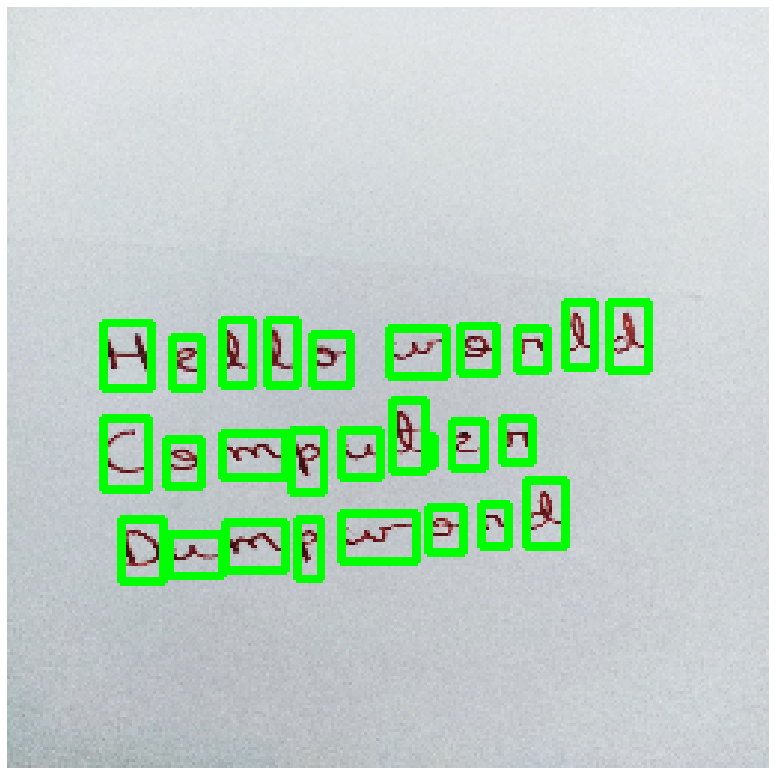

In [86]:
image_show(image)

In [87]:
out_path,out_dirs,out_files = next(os.walk("Output"))

In [88]:
#os.rmdir('Output')